In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [14]:
def dbscan_algoritm(dataframe):
    considered_feature = ['life_expec', 'income', 'gdpp']
    scaler = StandardScaler()
    scalar_data = scaler.fit_transform(dataframe[considered_feature])
    dbscan = DBSCAN(eps=0.2,min_samples=5)
    cluster = dbscan.fit_predict(scalar_data)
    return cluster

Cluster found are: [-1  0  1  2]
The size of the Cluster is: [57 95 10  5]


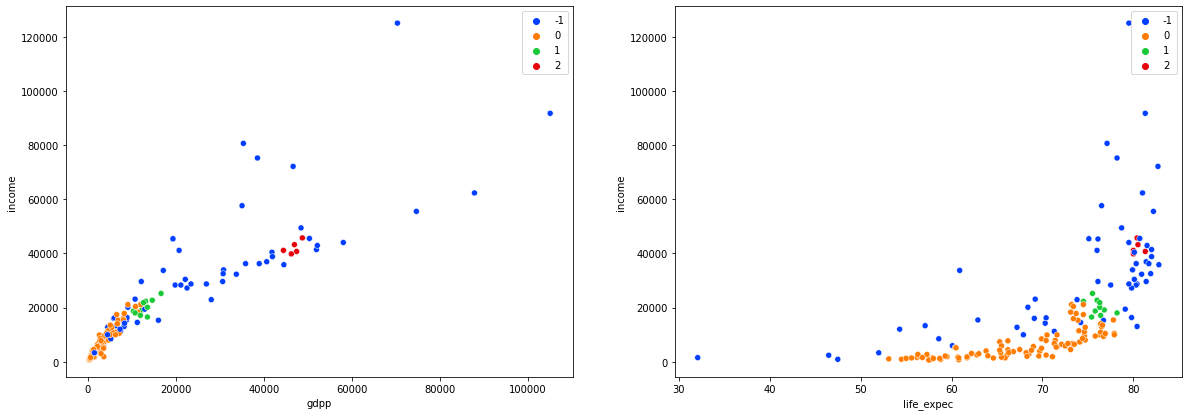

In [17]:
dataframe = pd.read_csv('Country-data.csv')

cluster = dbscan_algoritm(dataframe.copy())
dataframe['cluster'] = cluster
dbscan_cluster = np.unique(cluster)
print('Cluster found are:', dbscan_cluster)
print('The size of the Cluster is:', np.bincount(cluster + 1))

plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'income', data = dataframe, hue = 'cluster', palette = "bright")
plt.legend(loc = "best")
plt.xlabel('gdpp')
plt.ylabel('income')

plt.subplot(2, 2, 2)
sns.scatterplot(x = 'life_expec', y = 'income', data = dataframe, hue = 'cluster', palette = "bright")
plt.legend(loc = "best")
plt.xlabel('life_expec')
plt.ylabel('income')

plt.show()

In [16]:
for i in dbscan_cluster:
    countries = list(dataframe.loc[dataframe['cluster'] == i, 'country'])
    print ("Countries for the cluster are {values}:\n {countries}\n".format(values=i, countries=countries))

Countries for the cluster are -1:
 ['Angola', 'Australia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Botswana', 'Brazil', 'Brunei', 'Central African Republic', 'Chile', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Equatorial Guinea', 'France', 'Gabon', 'Germany', 'Greece', 'Grenada', 'Haiti', 'Iceland', 'Iraq', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Lebanon', 'Lesotho', 'Libya', 'Luxembourg', 'Malta', 'Namibia', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'Turkmenistan', 'United Arab Emirates', 'United Kingdom', 'United States', 'Zambia']

Countries for the cluster are 0:
 ['Afghanistan', 'Albania', 'Algeria', 'Armenia', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Chad', 'China', 'Co